# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [81]:
%matplotlib widget

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Study data files
mouse_metadata_path = Path(r'C:\Users\kylem\Desktop\Bootcamp_Assignments\Challenges\Challenge_5\Mouse_metadata.csv')
study_results_path = Path(r'C:\Users\kylem\Desktop\Bootcamp_Assignments\Challenges\Challenge_5\Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [83]:
# Checking the number of mice.
mouse_count = len(df['Mouse ID'].unique())
mouse_count

249

In [84]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = df.loc[df['Mouse ID'] == 'g989']
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = df.drop_duplicates(subset=["Mouse ID","Timepoint"])
#clean_df = df[df['Mouse ID'].isin(duplicate)==False]
clean_df = df[df['Mouse ID'].isin(duplicate['Mouse ID']) ==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [95]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_df['Mouse ID'].unique())
clean_mouse_count

248

## Summary Statistics

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#drug_reg = pd.DataFrame(clean_df.groupby('Drug Regimen'))
drug = clean_df.set_index('Drug Regimen')
drug_reg = drug.groupby('Drug Regimen')
tumor_vol = drug_reg["Tumor Volume (mm3)"]
mean = tumor_vol.mean()
median = tumor_vol.median()
var = tumor_vol.var()
stdev = tumor_vol.std()
sems = tumor_vol.sem()
# Assemble the resulting series into a single summary DataFrame.
drug_reg = pd.DataFrame({'Mean Tumor Volume': mean,
                        'Median Tumor Volume': median,
                        'Tumor Volume Variance': var,
                        'Tumor Volume Std. Dev.': stdev,
                         'Tumor Volume Std. Err.': sems})

drug_reg


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [97]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#drug_reg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
drug_reg = clean_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen')
summary_stats = drug_reg.agg(['mean', 'median','var','std','sem'])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

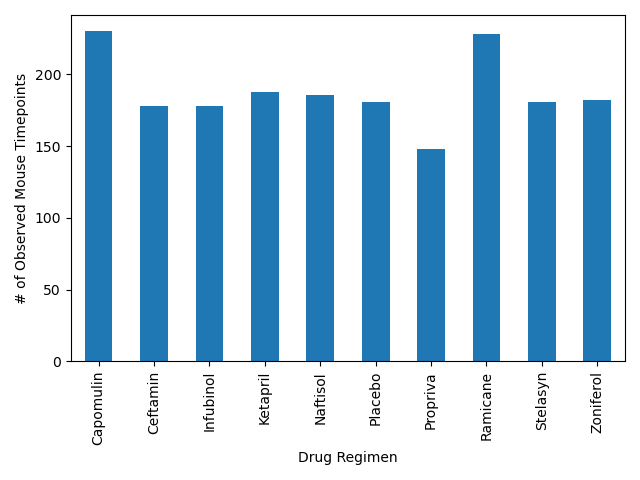

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
fig1, ax1 = plt.subplots()
mice_per_drug = clean_df.groupby('Drug Regimen').count().reset_index()
ax11 = mice_per_drug['Timepoint'].plot(kind='bar')
ax1.set_xticklabels(mice_per_drug['Drug Regimen'], rotation=90)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()


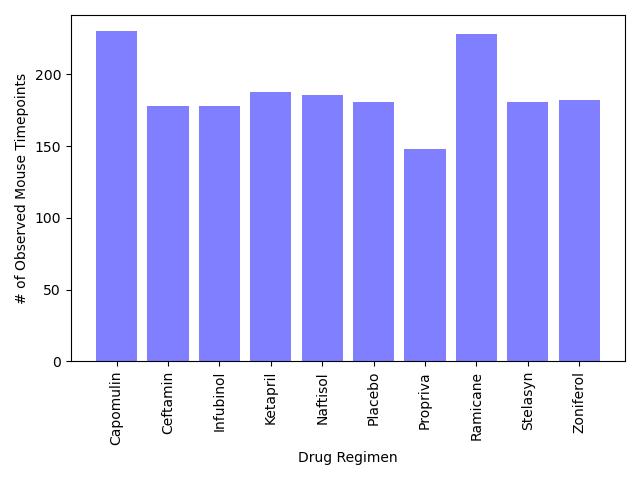

In [99]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig2, ax2= plt.subplots()
ax2.bar(mice_per_drug['Drug Regimen'], mice_per_drug['Mouse ID'], color='blue', alpha=0.5)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()

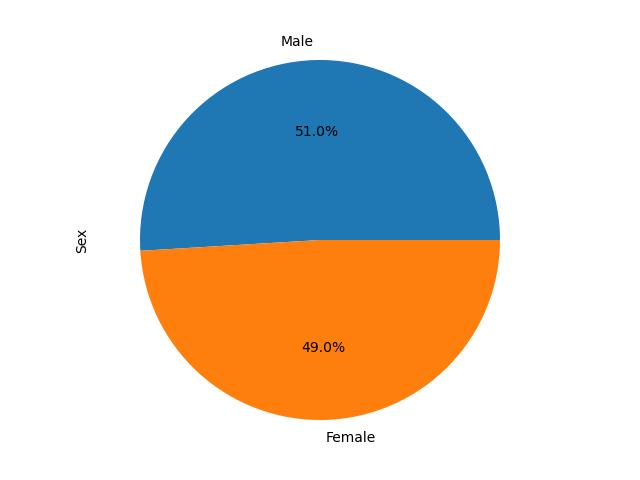

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fig3, ax3=plt.subplots()
sex = clean_df['Sex'].value_counts()
ax3 = sex.plot(kind='pie',autopct="%1.1f%%")
ax3.set_ylabel('Sex')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Sex')

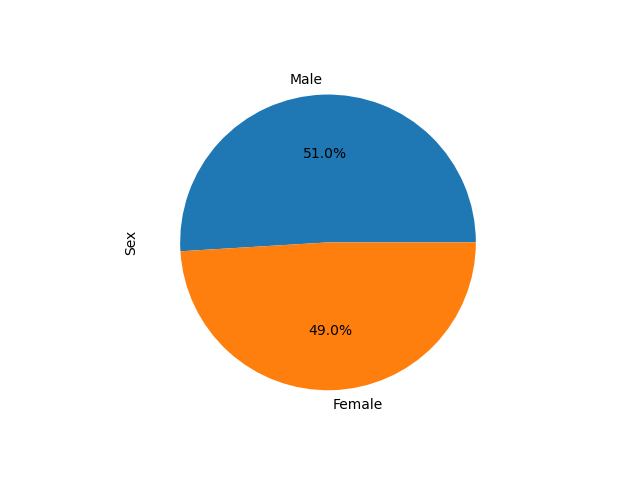

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig4, ax4 = plt.subplots()
plt.pie(sex, labels = sex.index, autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [150]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
ramicane = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']
infubinol = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol']
ceftamin = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = pd.DataFrame(capomulin.groupby('Mouse ID').max()['Timepoint']).reset_index()
ramicane_last = pd.DataFrame(ramicane.groupby('Mouse ID').max()['Timepoint']).reset_index()
infubinol_last = pd.DataFrame(infubinol.groupby('Mouse ID').max()['Timepoint']).reset_index()
ceftamin_last = pd.DataFrame(ceftamin.groupby('Mouse ID').max()['Timepoint']).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_mer = pd.merge(clean_df,capomulin_last, how='right', on=('Mouse ID','Timepoint'))
ramicane_mer = pd.merge(clean_df,ramicane_last, how='right', on=('Mouse ID','Timepoint'))
infubinol_mer = pd.merge(clean_df,infubinol_last, how='right', on=('Mouse ID','Timepoint'))
ceftamin_mer = pd.merge(clean_df,ceftamin_last, how='right', on=('Mouse ID','Timepoint'))
all_merge = pd.concat([capomulin_mer,ramicane_mer,infubinol_mer,ceftamin_mer])

In [234]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)

tumor_plot =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    tumor = all_merge[all_merge['Drug Regimen'] == drug]['Tumor Volume (mm3)'].dropna()
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_plot.append(tumor.values)
    print('-------------------------------------------------------------------------------------')
    print(f'The lower quartile of {drug} is {lowerq}')
    print(f'The upper quartile of {drug} is {upperq}')
    print(f'The interquartile range of {drug} is {iqr}')
    print(f'Values below {lower_bound} or above {upper_bound} could be outliers for {drug}')
  


-------------------------------------------------------------------------------------
The lower quartile of Capomulin is 32.37735684
The upper quartile of Capomulin is 40.1592203
The interquartile range of Capomulin is 7.781863460000004
Values below 20.70456164999999 or above 51.83201549 could be outliers for Capomulin
-------------------------------------------------------------------------------------
The lower quartile of Ramicane is 31.56046955
The upper quartile of Ramicane is 40.65900627
The interquartile range of Ramicane is 9.098536719999998
Values below 17.912664470000003 or above 54.30681135 could be outliers for Ramicane
-------------------------------------------------------------------------------------
The lower quartile of Infubinol is 54.04860769
The upper quartile of Infubinol is 65.52574285
The interquartile range of Infubinol is 11.477135160000003
Values below 36.83290494999999 or above 82.74144559000001 could be outliers for Infubinol
-------------------------------

C:\Users\kylem\AppData\Local\Temp\ipykernel_12436\2097065237.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(treatments)


{'whiskers': [<matplotlib.lines.Line2D at 0x1b15fbc71f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b15fbc7730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b15fbc6f50>,
 'medians': [<matplotlib.lines.Line2D at 0x1b15fbc7c70>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b15fbc7ee0>,
 'means': []}

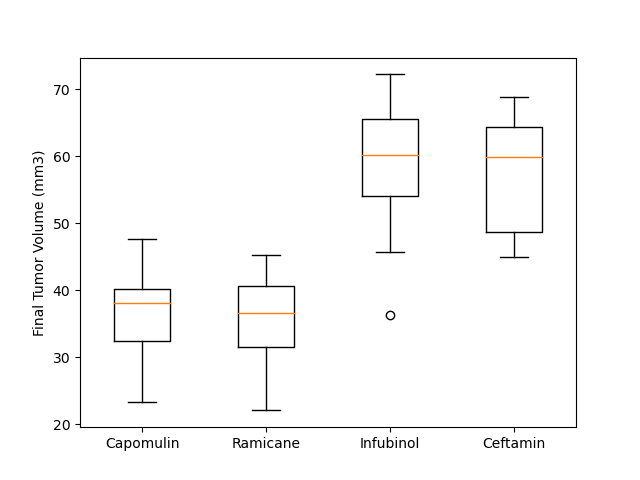

In [248]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig5, ax5 = plt.subplots()
ax5.set_ylabel('Final Tumor Volume (mm3)')
ax5.set_xticklabels(treatments)

ax5.boxplot(tumor_plot, labels=treatments)

## Line and Scatter Plots

In [269]:
line_df = capomulin.loc[capomulin["Mouse ID"] == "l509"]
line_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21


Text(0, 0.5, 'Timepoint (Days)')

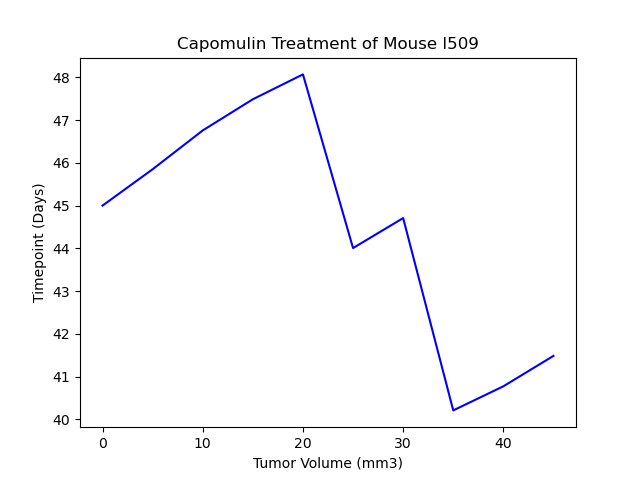

In [273]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

x_axis = line_df['Timepoint']
y_axis= line_df['Tumor Volume (mm3)']

fig6, ax6 = plt.subplots()
plt.plot(x_axis,y_axis, color='blue')
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint (Days)')

C:\Users\kylem\AppData\Local\Temp\ipykernel_12436\4149778146.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ave_c = capomulin.groupby('Mouse ID').mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

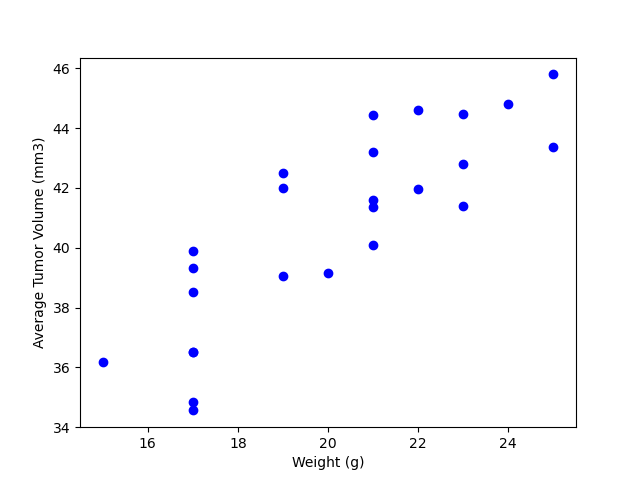

In [275]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig7, ax7 = plt.subplots()

ave_c = capomulin.groupby('Mouse ID').mean()
plt.scatter(ave_c['Weight (g)'], ave_c['Tumor Volume (mm3)'], marker='o', facecolors='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse wight and the average tumor volume is 0.7088568047708723


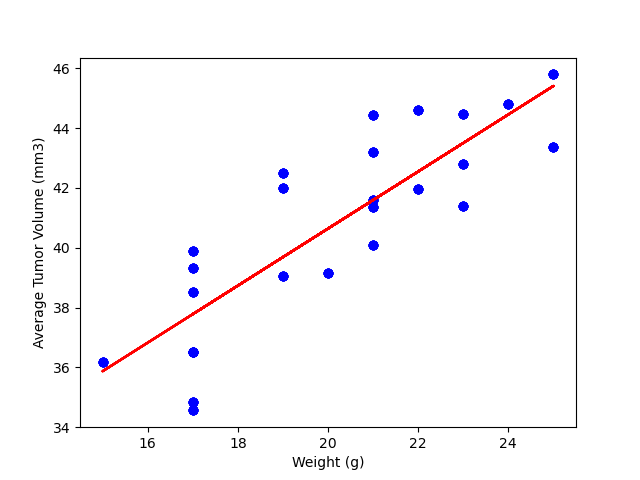

In [283]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ave_c['Weight (g)'], ave_c['Tumor Volume (mm3)'])
regress_values = ave_c['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(ave_c['Weight (g)'], ave_c['Tumor Volume (mm3)'], marker='o', facecolors='blue')
plt.plot(ave_c['Weight (g)'], regress_values,'r-')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse wight and the average tumor volume is {rvalue**2}')
plt.show()
